In [1]:
import rdkit
from rdkit import Chem
import pandas as pd


In [2]:
df = pd.read_csv("sampling_vegfr.csv")

In [4]:
df

,SMILES,NLL
0,Cc1cc2cc(Cl)cn2c(Cc2ccc(F)c(C(=O)NCCC(=O)O)c2)n1,21.16
1,Cc1ccc(F)c(NC(=O)Nc2ccc(Oc3ccnc4cc(C(=O)NCCCN5...,5.68
2,Cc1ccc(F)c(NC(=O)Nc2ccc(Oc3ccnc4cc(C(=O)NCCCN5...,9.79
3,Cc1ccc(F)c(NC(=O)Nc2ccc(Oc3ccnc(-c4cc(C(=O)N5C...,16.40
4,Cc1ccc(CC(=O)NC2CCN(Cc3c[nH]c4ccc(F)cc34)C2)cc1,22.99
...,...,...
2970,COc1ccc2c(=NCCN)cc(-c3ccccc3OC)[nH]c2c1,23.92
2971,Cc1ccc(C(=O)Nc2ccc3c(C(=O)Nc4ccc(-n5c(C)ccc5C)...,28.49
2972,CC(=O)c1ccc(OCCN2CCOCC2)cc1O,16.84
2973,CCN(CC)CCNCc1cc(Oc2ccc(NC(=O)Nc3ccc(C)c(C)c3)c...,23.39


In [5]:
df["Mol"] = df["SMILES"].apply(Chem.MolFromSmiles)

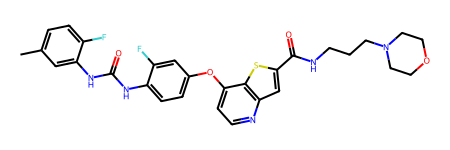

In [6]:
df['Mol'][1]

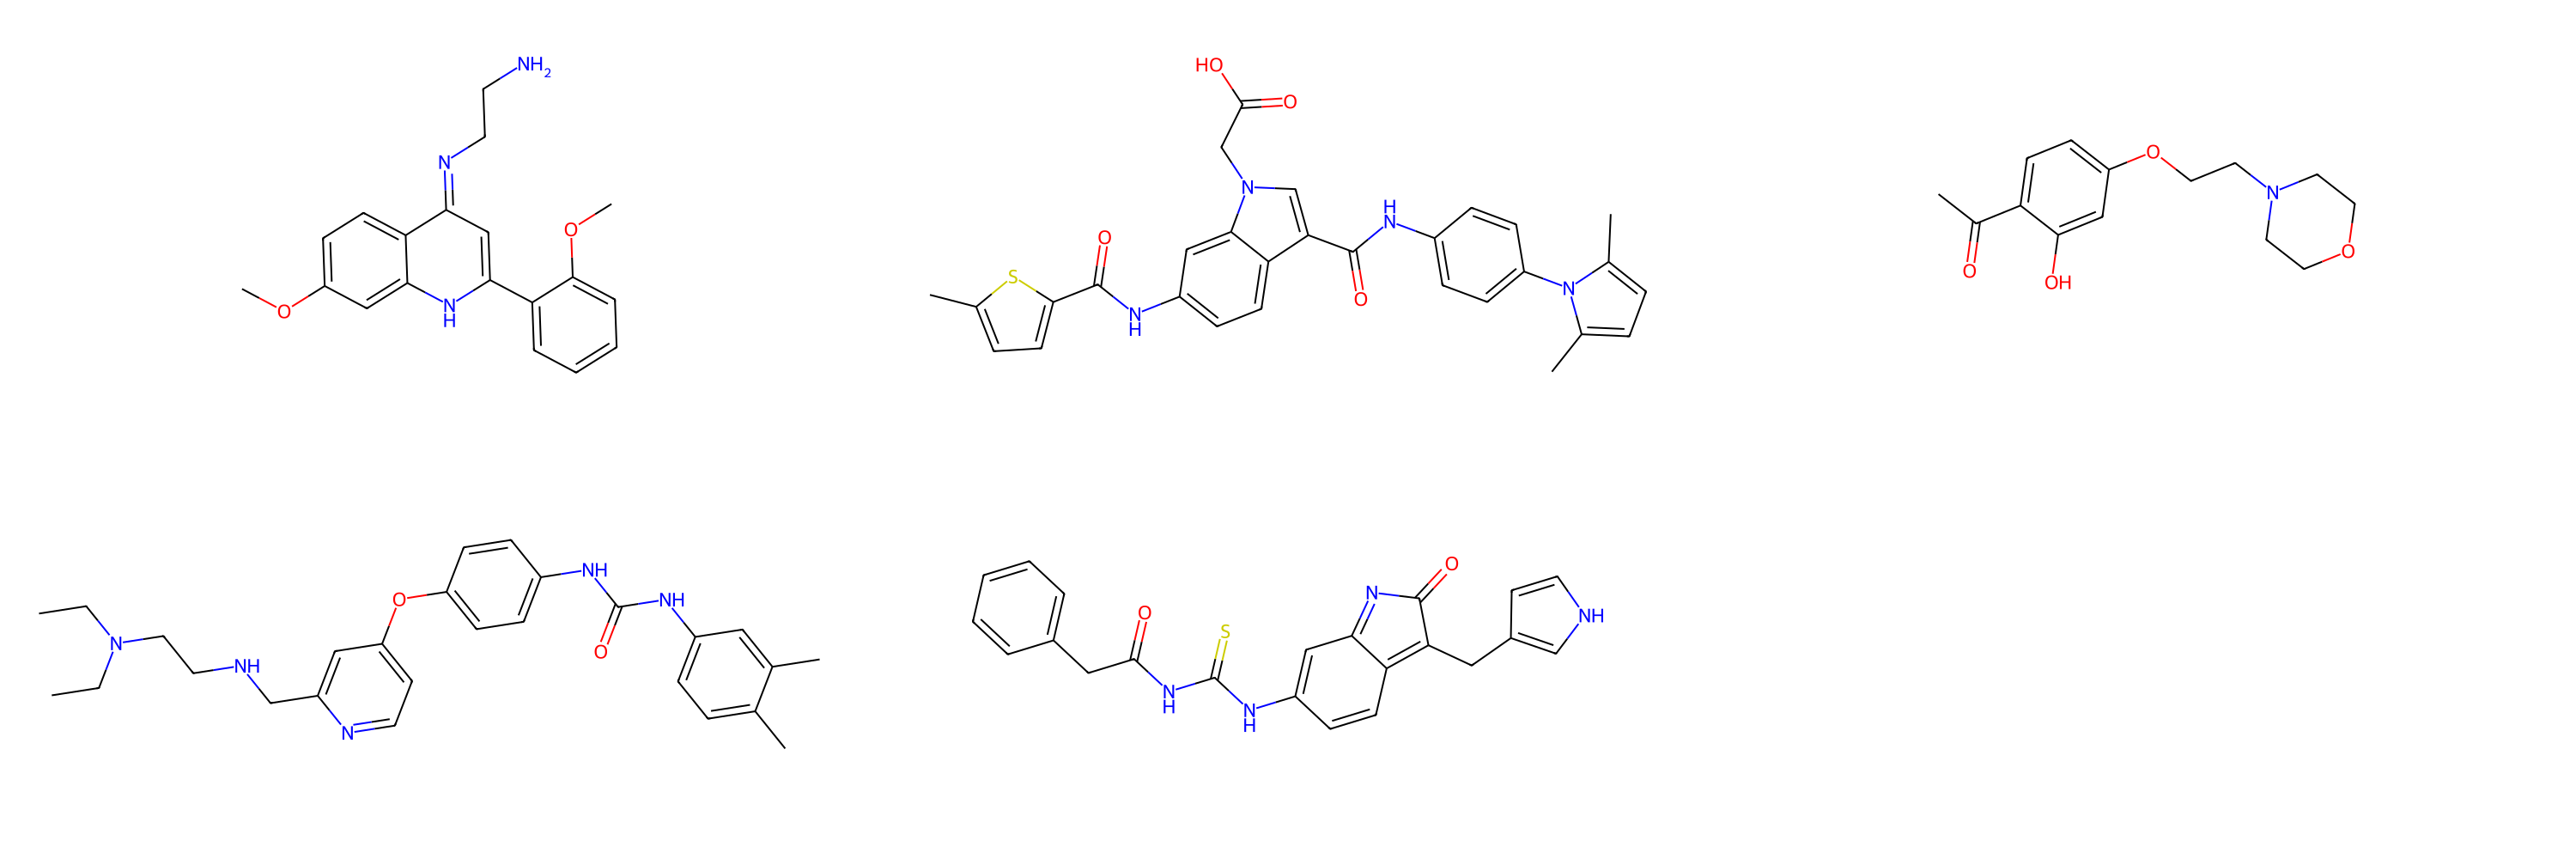

In [8]:

from rdkit.Chem import Draw
img = Draw.MolsToGridImage(df.tail(5)['Mol'], molsPerRow=3, subImgSize=(1000, 500))
img

In [9]:
from rdkit.Chem import Descriptors

In [10]:
df['qed'] = df['Mol'].apply(Descriptors.qed)

In [11]:
from rdkit.Contrib.SA_Score import sascorer

In [12]:
df['sascore'] = df['Mol'].apply(sascorer.calculateScore)

In [13]:
df

,SMILES,NLL,Mol,qed,sascore
0,Cc1cc2cc(Cl)cn2c(Cc2ccc(F)c(C(=O)NCCC(=O)O)c2)n1,21.16,<rdkit.Chem.rdchem.Mol object at 0x146113530>,0.677581,2.656781
1,Cc1ccc(F)c(NC(=O)Nc2ccc(Oc3ccnc4cc(C(=O)NCCCN5...,5.68,<rdkit.Chem.rdchem.Mol object at 0x146113610>,0.216896,2.702944
2,Cc1ccc(F)c(NC(=O)Nc2ccc(Oc3ccnc4cc(C(=O)NCCCN5...,9.79,<rdkit.Chem.rdchem.Mol object at 0x146113290>,0.168137,3.134333
3,Cc1ccc(F)c(NC(=O)Nc2ccc(Oc3ccnc(-c4cc(C(=O)N5C...,16.40,<rdkit.Chem.rdchem.Mol object at 0x146113b50>,0.321088,2.541467
4,Cc1ccc(CC(=O)NC2CCN(Cc3c[nH]c4ccc(F)cc34)C2)cc1,22.99,<rdkit.Chem.rdchem.Mol object at 0x146113680>,0.726440,2.567539
...,...,...,...,...,...
2970,COc1ccc2c(=NCCN)cc(-c3ccccc3OC)[nH]c2c1,23.92,<rdkit.Chem.rdchem.Mol object at 0x1461852a0>,0.758084,2.568229
2971,Cc1ccc(C(=O)Nc2ccc3c(C(=O)Nc4ccc(-n5c(C)ccc5C)...,28.49,<rdkit.Chem.rdchem.Mol object at 0x146185310>,0.241567,2.585070
2972,CC(=O)c1ccc(OCCN2CCOCC2)cc1O,16.84,<rdkit.Chem.rdchem.Mol object at 0x146185380>,0.813318,2.009049
2973,CCN(CC)CCNCc1cc(Oc2ccc(NC(=O)Nc3ccc(C)c(C)c3)c...,23.39,<rdkit.Chem.rdchem.Mol object at 0x1461853f0>,0.325641,2.323767


In [14]:
df = df[df['qed'] > 0.7]

In [15]:
df

,SMILES,NLL,Mol,qed,sascore
4,Cc1ccc(CC(=O)NC2CCN(Cc3c[nH]c4ccc(F)cc34)C2)cc1,22.99,<rdkit.Chem.rdchem.Mol object at 0x146113680>,0.726440,2.567539
7,C=C(CN1CCN(C)CC1)c1ccc2c(c1)CCN2C(=O)CCCc1ccccc1,25.02,<rdkit.Chem.rdchem.Mol object at 0x146113ae0>,0.702409,2.375253
17,COc1ccccc1NC(=O)Nc1cccnc1,14.38,<rdkit.Chem.rdchem.Mol object at 0x146113a70>,0.870770,1.618306
22,O=C(O)c1cc2c(=O)c(Cc3ccccc3)coc2cc1O,20.83,<rdkit.Chem.rdchem.Mol object at 0x146113d80>,0.775604,2.173232
23,O=C1NCc2ccc(Nc3ccc(O)cc3)cc21,18.41,<rdkit.Chem.rdchem.Mol object at 0x146113df0>,0.706152,2.124050
...,...,...,...,...,...
2958,Cc1ccc2sc(C(=O)Nc3ccc(F)cc3)c(N)c2c1,16.08,<rdkit.Chem.rdchem.Mol object at 0x146184d60>,0.745531,1.913480
2964,O=C(NCC1CCNCC1)c1cncc(-c2cccc(F)c2)c1,16.59,<rdkit.Chem.rdchem.Mol object at 0x146185000>,0.912138,2.174901
2969,COc1ccc(C2CC(=O)Nc3ccccc3N2)cc1OC,22.12,<rdkit.Chem.rdchem.Mol object at 0x146185230>,0.913299,2.569268
2970,COc1ccc2c(=NCCN)cc(-c3ccccc3OC)[nH]c2c1,23.92,<rdkit.Chem.rdchem.Mol object at 0x1461852a0>,0.758084,2.568229


In [23]:
df = df[df['sascore'] < 3]

In [24]:
df

,SMILES,NLL,Mol,qed,sascore
4,Cc1ccc(CC(=O)NC2CCN(Cc3c[nH]c4ccc(F)cc34)C2)cc1,22.99,<rdkit.Chem.rdchem.Mol object at 0x146113680>,0.726440,2.567539
7,C=C(CN1CCN(C)CC1)c1ccc2c(c1)CCN2C(=O)CCCc1ccccc1,25.02,<rdkit.Chem.rdchem.Mol object at 0x146113ae0>,0.702409,2.375253
17,COc1ccccc1NC(=O)Nc1cccnc1,14.38,<rdkit.Chem.rdchem.Mol object at 0x146113a70>,0.870770,1.618306
22,O=C(O)c1cc2c(=O)c(Cc3ccccc3)coc2cc1O,20.83,<rdkit.Chem.rdchem.Mol object at 0x146113d80>,0.775604,2.173232
23,O=C1NCc2ccc(Nc3ccc(O)cc3)cc21,18.41,<rdkit.Chem.rdchem.Mol object at 0x146113df0>,0.706152,2.124050
...,...,...,...,...,...
2958,Cc1ccc2sc(C(=O)Nc3ccc(F)cc3)c(N)c2c1,16.08,<rdkit.Chem.rdchem.Mol object at 0x146184d60>,0.745531,1.913480
2964,O=C(NCC1CCNCC1)c1cncc(-c2cccc(F)c2)c1,16.59,<rdkit.Chem.rdchem.Mol object at 0x146185000>,0.912138,2.174901
2969,COc1ccc(C2CC(=O)Nc3ccccc3N2)cc1OC,22.12,<rdkit.Chem.rdchem.Mol object at 0x146185230>,0.913299,2.569268
2970,COc1ccc2c(=NCCN)cc(-c3ccccc3OC)[nH]c2c1,23.92,<rdkit.Chem.rdchem.Mol object at 0x1461852a0>,0.758084,2.568229


In [25]:
df.reset_index(inplace=True, drop=True)

In [26]:
df

,SMILES,NLL,Mol,qed,sascore
0,Cc1ccc(CC(=O)NC2CCN(Cc3c[nH]c4ccc(F)cc34)C2)cc1,22.99,<rdkit.Chem.rdchem.Mol object at 0x146113680>,0.726440,2.567539
1,C=C(CN1CCN(C)CC1)c1ccc2c(c1)CCN2C(=O)CCCc1ccccc1,25.02,<rdkit.Chem.rdchem.Mol object at 0x146113ae0>,0.702409,2.375253
2,COc1ccccc1NC(=O)Nc1cccnc1,14.38,<rdkit.Chem.rdchem.Mol object at 0x146113a70>,0.870770,1.618306
3,O=C(O)c1cc2c(=O)c(Cc3ccccc3)coc2cc1O,20.83,<rdkit.Chem.rdchem.Mol object at 0x146113d80>,0.775604,2.173232
4,O=C1NCc2ccc(Nc3ccc(O)cc3)cc21,18.41,<rdkit.Chem.rdchem.Mol object at 0x146113df0>,0.706152,2.124050
...,...,...,...,...,...
467,Cc1ccc2sc(C(=O)Nc3ccc(F)cc3)c(N)c2c1,16.08,<rdkit.Chem.rdchem.Mol object at 0x146184d60>,0.745531,1.913480
468,O=C(NCC1CCNCC1)c1cncc(-c2cccc(F)c2)c1,16.59,<rdkit.Chem.rdchem.Mol object at 0x146185000>,0.912138,2.174901
469,COc1ccc(C2CC(=O)Nc3ccccc3N2)cc1OC,22.12,<rdkit.Chem.rdchem.Mol object at 0x146185230>,0.913299,2.569268
470,COc1ccc2c(=NCCN)cc(-c3ccccc3OC)[nH]c2c1,23.92,<rdkit.Chem.rdchem.Mol object at 0x1461852a0>,0.758084,2.568229


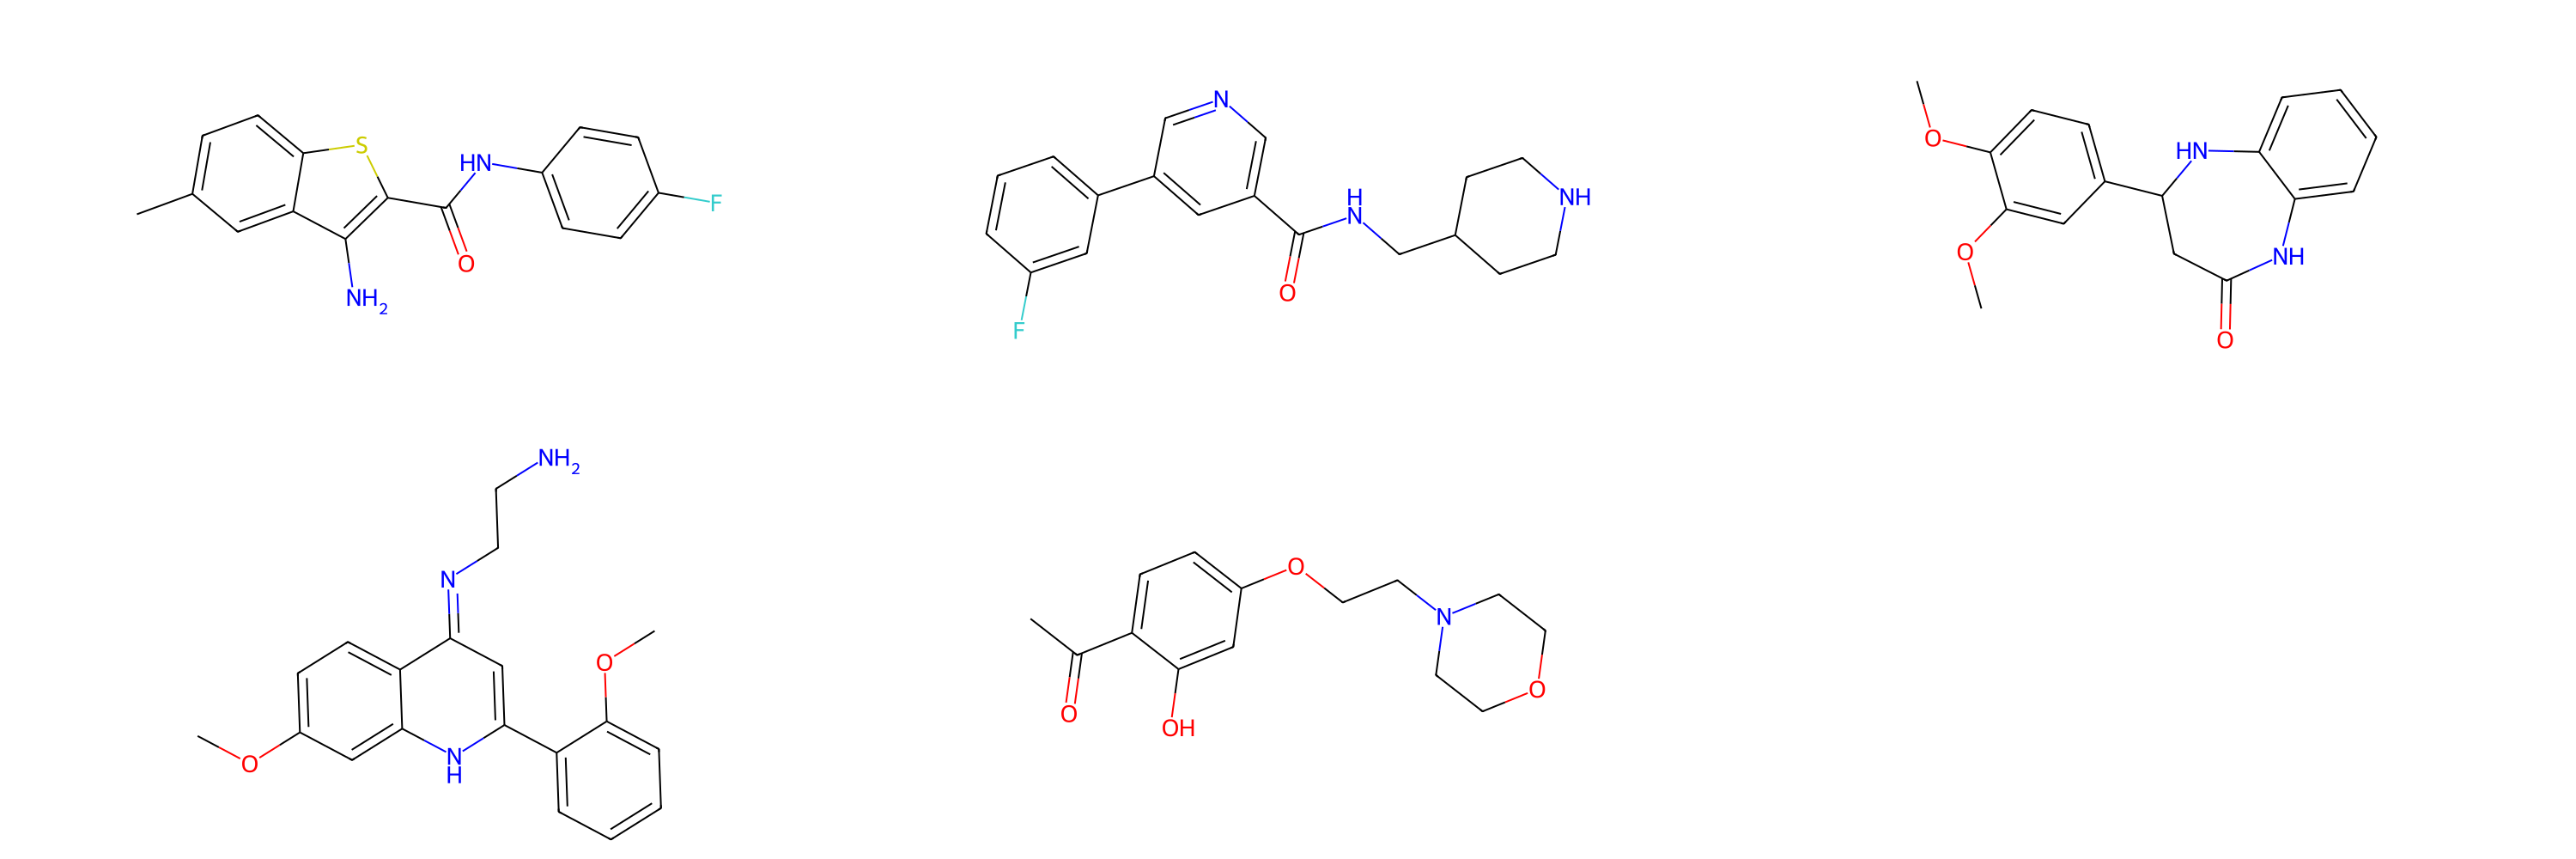

In [31]:
img = Draw.MolsToGridImage(df.tail(5)['Mol'], molsPerRow=3, subImgSize=(1000, 500))
img

In [32]:
df

,SMILES,NLL,Mol,qed,sascore
0,Cc1ccc(CC(=O)NC2CCN(Cc3c[nH]c4ccc(F)cc34)C2)cc1,22.99,<rdkit.Chem.rdchem.Mol object at 0x146113680>,0.726440,2.567539
1,C=C(CN1CCN(C)CC1)c1ccc2c(c1)CCN2C(=O)CCCc1ccccc1,25.02,<rdkit.Chem.rdchem.Mol object at 0x146113ae0>,0.702409,2.375253
2,COc1ccccc1NC(=O)Nc1cccnc1,14.38,<rdkit.Chem.rdchem.Mol object at 0x146113a70>,0.870770,1.618306
3,O=C(O)c1cc2c(=O)c(Cc3ccccc3)coc2cc1O,20.83,<rdkit.Chem.rdchem.Mol object at 0x146113d80>,0.775604,2.173232
4,O=C1NCc2ccc(Nc3ccc(O)cc3)cc21,18.41,<rdkit.Chem.rdchem.Mol object at 0x146113df0>,0.706152,2.124050
...,...,...,...,...,...
467,Cc1ccc2sc(C(=O)Nc3ccc(F)cc3)c(N)c2c1,16.08,<rdkit.Chem.rdchem.Mol object at 0x146184d60>,0.745531,1.913480
468,O=C(NCC1CCNCC1)c1cncc(-c2cccc(F)c2)c1,16.59,<rdkit.Chem.rdchem.Mol object at 0x146185000>,0.912138,2.174901
469,COc1ccc(C2CC(=O)Nc3ccccc3N2)cc1OC,22.12,<rdkit.Chem.rdchem.Mol object at 0x146185230>,0.913299,2.569268
470,COc1ccc2c(=NCCN)cc(-c3ccccc3OC)[nH]c2c1,23.92,<rdkit.Chem.rdchem.Mol object at 0x1461852a0>,0.758084,2.568229


In [33]:
df.to_csv("filtered_qed_sascore.csv")